<a href="https://colab.research.google.com/github/SHREYANSH22-stack/PRESSURE-PROFILE/blob/main/predictive%20maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-40b1b71cbd0e>:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2023-01-01', periods=n_samples, freq='H')


            Timestamp    Sensor1     Sensor2   Sensor3  Failure
0 2023-01-01 00:00:00  27.483571  113.993554  0.043248        0
1 2023-01-01 01:00:00  24.308678  109.246337  0.048555        0
2 2023-01-01 02:00:00  28.238443  100.596304  0.042076        0
3 2023-01-01 03:00:00  32.615149   93.530632  0.046920        0
4 2023-01-01 04:00:00  23.829233  106.982233  0.031064        0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.9181 - loss: 0.6566 - val_accuracy: 0.9474 - val_loss: 0.5252
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9444 - loss: 0.4497 - val_accuracy: 0.9474 - val_loss: 0.2188
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9600 - loss: 0.2087 - val_accuracy: 0.9474 - val_loss: 0.2135
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9514 - loss: 0.2162 - val_accuracy: 0.9474 - val_loss: 0.2242
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9517 - loss: 0.2043 - val_accuracy: 0.9474 - val_loss: 0.2241
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9559 - loss: 0.1814 - val_accuracy: 0.9474 - val_loss: 0.2129
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9498 - loss: 0.2041 - val_accuracy: 0.9474 - val_loss: 0.2124
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9601 - loss: 0.1729 - val_accuracy: 0.9474 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


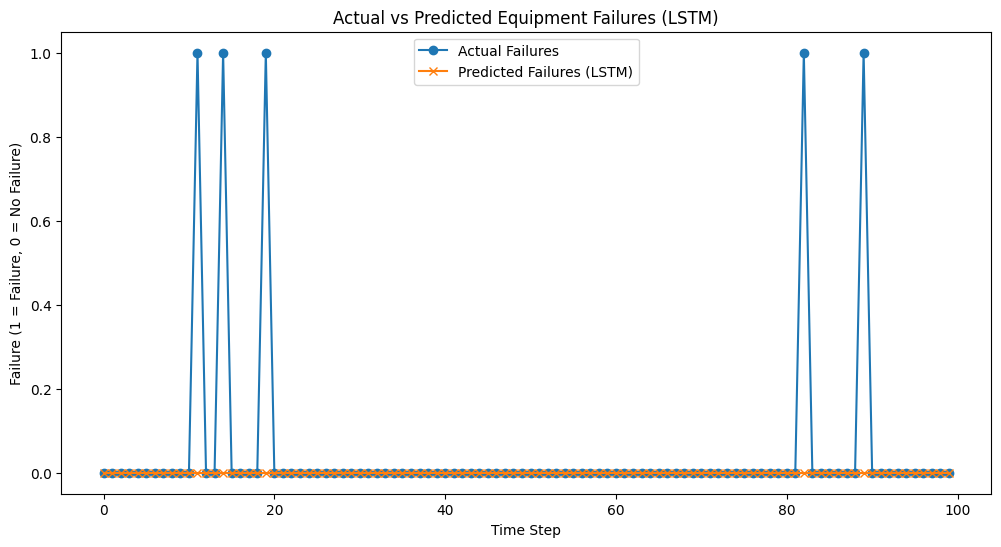

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Generate a Synthetic Dataset
def create_synthetic_data():
    np.random.seed(42)
    n_samples = 1000
    timestamps = pd.date_range(start='2023-01-01', periods=n_samples, freq='H')
    sensor1 = np.random.normal(loc=25, scale=5, size=n_samples)
    sensor2 = np.random.normal(loc=100, scale=10, size=n_samples)
    sensor3 = np.random.normal(loc=0.05, scale=0.01, size=n_samples)
    failure = [0] * 950 + [1] * 50
    random.shuffle(failure)

    data = pd.DataFrame({
        'Timestamp': timestamps,
        'Sensor1': sensor1,
        'Sensor2': sensor2,
        'Sensor3': sensor3,
        'Failure': failure
    })
    return data

# Step 2: Load and Preprocess Data
data = create_synthetic_data()
print(data.head())

# Separate features and target variable
X = data[['Sensor1', 'Sensor2', 'Sensor3']].values
y = data['Failure'].values

# Normalize sensor data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Create Time-Series Sequences
def create_sequences(data, target, time_steps=10):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:i + time_steps])
        ys.append(target[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

# Step 3: Build and Train LSTM Model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=64, validation_data=(X_test_seq, y_test_seq))

# Step 4: Evaluate LSTM Model
y_pred_lstm = model.predict(X_test_seq)
y_pred_class_lstm = (y_pred_lstm > 0.5).astype(int)

print("LSTM Classification Report:")
print(classification_report(y_test_seq, y_pred_class_lstm))
print("LSTM Confusion Matrix:")
print(confusion_matrix(y_test_seq, y_pred_class_lstm))

# Step 5: Build and Evaluate Logistic Regression Model
X_train_flat = X_train_seq[:, -1, :]
X_test_flat = X_test_seq[:, -1, :]

logreg = LogisticRegression()
logreg.fit(X_train_flat, y_train_seq)
y_pred_lr = logreg.predict(X_test_flat)

print('Logistic Regression Accuracy:', accuracy_score(y_test_seq, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test_seq, y_pred_lr))

# Step 6: Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq[:100], label='Actual Failures', marker='o')
plt.plot(y_pred_class_lstm[:100], label='Predicted Failures (LSTM)', marker='x')
plt.title('Actual vs Predicted Equipment Failures (LSTM)')
plt.xlabel('Time Step')
plt.ylabel('Failure (1 = Failure, 0 = No Failure)')
plt.legend()
plt.show()


